In [37]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [141]:
DB_PATH = '/Users/farazahmed/Documents/GitHub/steam-discount-forecast/data/steam_sales.db'

In [5]:
con = sqlite3.connect('/Users/farazahmed/Documents/GitHub/steam-discount-forecast/data/steam_sales.db')

In [6]:
pd.read_sql("SELECT * " \
            "FROM (SELECT *, ROW_NUMBER() OVER(PARTITION BY itad_id ORDER BY ts_utc ASC) AS rnk FROM history_events) " \
            "WHERE rnk = 1 OR rnk = 2;", con)

,itad_id,ts_utc,price,regular,cut,rnk
0,018d937e-e9b5-71d6-a320-3543fb1ce11f,2024-02-11T10:30:56Z,0.00,0.00,0,1
1,018d937e-e9b7-73a9-84e1-1546a85c9841,2024-03-29T13:48:08Z,0.59,0.99,40,1
2,018d937e-e9b7-73a9-84e1-1546a85c9841,2024-04-12T17:18:40Z,0.99,0.99,0,2
3,018d937e-e9ba-71b7-b901-de864dd7397c,2023-10-28T04:37:42Z,10.39,12.99,20,1
4,018d937e-e9ba-71b7-b901-de864dd7397c,2023-11-03T17:19:01Z,12.99,12.99,0,2
...,...,...,...,...,...,...
75464,0198f191-e917-719b-8a07-2fea98b85bf2,2024-08-22T17:18:30Z,19.99,19.99,0,2
75465,01992fe7-8681-71b7-b82d-a5254c67ce6a,2023-09-27T08:48:18Z,0.00,0.00,0,1
75466,01993ad9-005a-72ab-be35-3335a3bb91f4,2024-06-18T18:18:15Z,0.00,0.00,0,1
75467,01993ed3-ac1b-733a-9c0b-195e7ce86a21,2023-11-21T17:33:21Z,12.99,12.99,0,1


In [31]:
games = pd.read_sql("SELECT * FROM games;", con)
games

,itad_id,appid,title,type,release_date,early_access,mature
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0
1,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0
2,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0
3,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0
4,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0
...,...,...,...,...,...,...,...
43135,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0
43136,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0
43137,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0
43138,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0


In [33]:
games['release_year'] = pd.to_datetime(games['release_date']).dt.year
games['release_month'] = pd.to_datetime(games['release_date']).dt.month
games['release_day'] = pd.to_datetime(games['release_date']).dt.day
games

,itad_id,appid,title,type,release_date,early_access,mature,release_year,release_month,release_day
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,2021,9,28
1,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,2023,4,18
2,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,2023,7,6
3,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,2021,6,22
4,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,2021,7,28
...,...,...,...,...,...,...,...,...,...,...
43135,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,2024,9,13
43136,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,2024,9,11
43137,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,2024,9,11
43138,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,2024,9,10


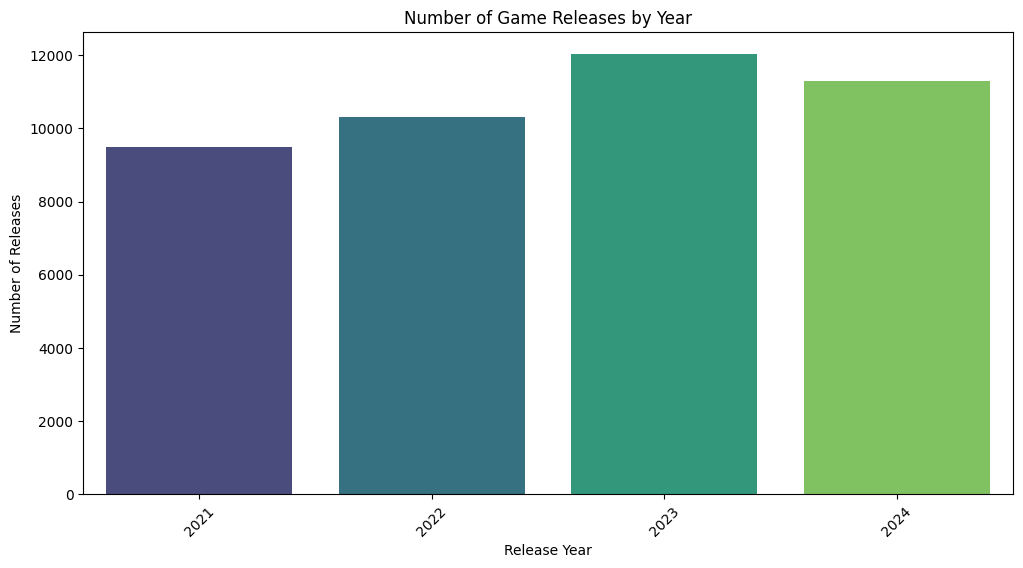

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=games, x='release_year', palette='viridis')
plt.title('Number of Game Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

#### We can see from the above plot that 2023 has had the highest number of game releases in recent years.

In [44]:
releases_2021 = games[games['release_year'] == 2021]
releases_2022 = games[games['release_year'] == 2022]
releases_2023 = games[games['release_year'] == 2023]
releases_2024 = games[games['release_year'] == 2024]

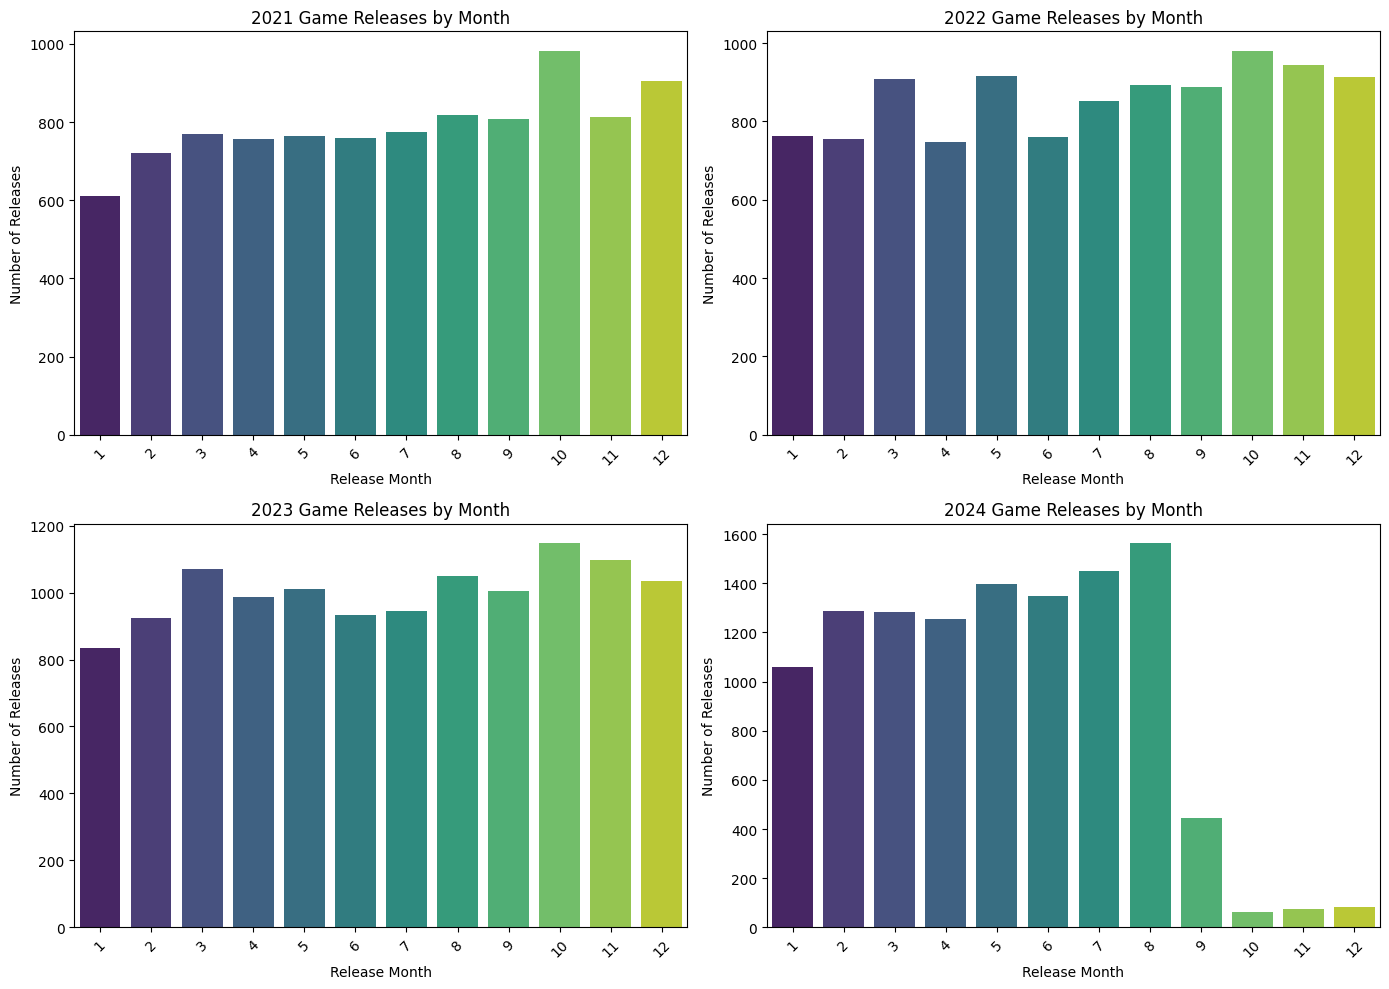

In [48]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=releases_2021, x='release_month', palette='viridis')
plt.title('2021 Game Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(data=releases_2022, x='release_month', palette='viridis')
plt.title('2022 Game Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(data=releases_2023, x='release_month', palette='viridis')
plt.title('2023 Game Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(data=releases_2024, x='release_month', palette='viridis')
plt.title('2024 Game Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Release trends over the months seems to be the same each year.
#### Quarter 4 sees the highest number of releases which makes sense since it is the holiday season.
#### Releases slow down right aafter the holiday season for a couple of months.
#### Game releases picks up during the spring and then steadily rises.

### Early access games are defined as games that are playable but unfinished, developers keep updating the game over time. Lets observe the number of early access games for each year.

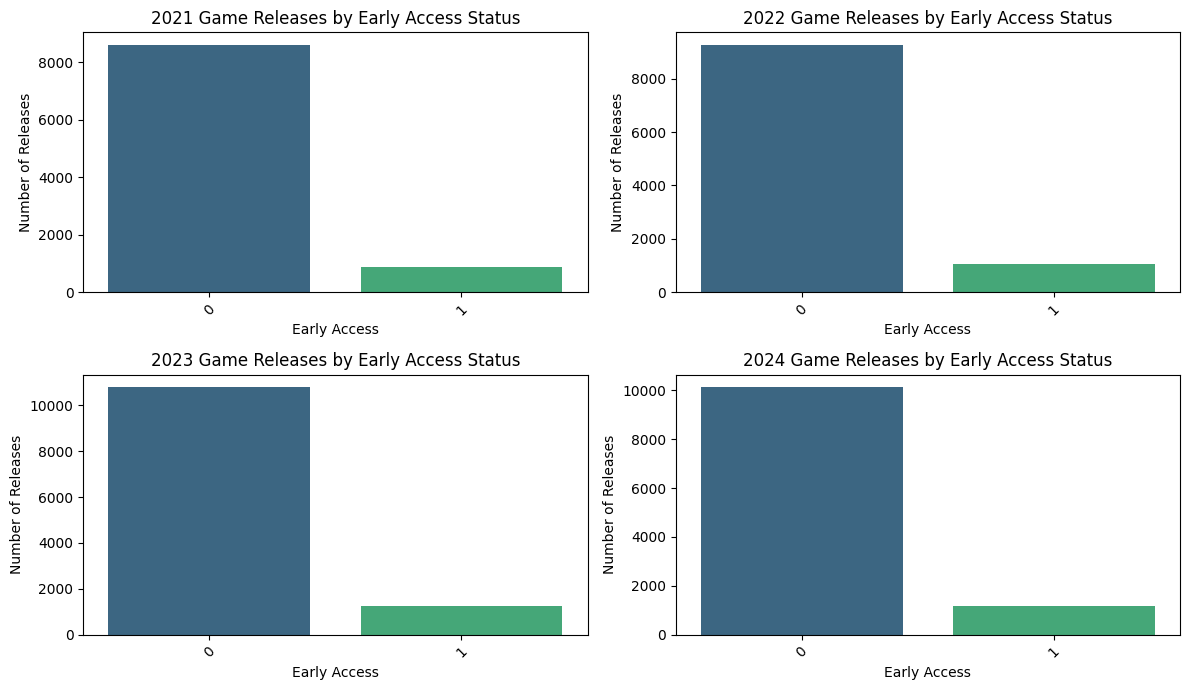

In [70]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
sns.countplot(data=releases_2021, x='early_access', palette='viridis')
plt.title('2021 Game Releases by Early Access Status')
plt.xlabel('Early Access')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(data=releases_2022, x='early_access', palette='viridis')
plt.title('2022 Game Releases by Early Access Status')
plt.xlabel('Early Access')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(data=releases_2023, x='early_access', palette='viridis')
plt.title('2023 Game Releases by Early Access Status')
plt.xlabel('Early Access')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(data=releases_2024, x='early_access', palette='viridis')
plt.title('2024 Game Releases by Early Access Status')
plt.xlabel('Early Access')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()

#### We can observe that early access games remain in the minority each year. Majority of the games are released in the completed state.

### Lets now see number of games tagged as mature. A game is called mature if is has tags such as - violence, gore, sexual themes, gambling, etc.

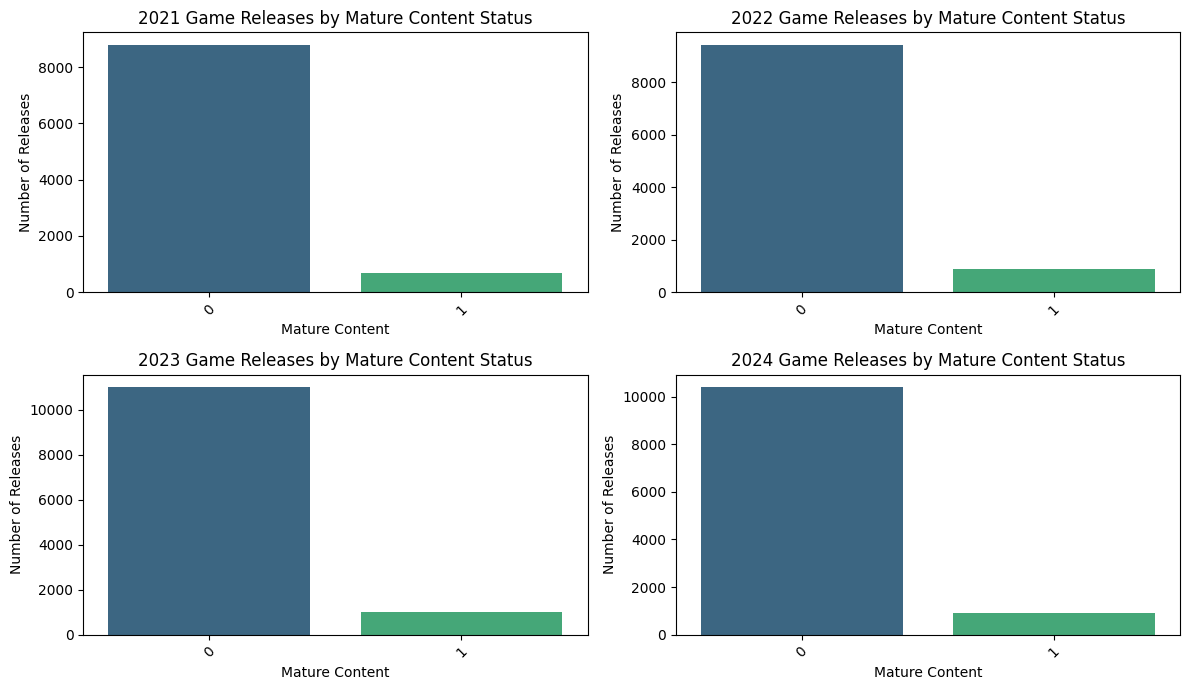

In [71]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
sns.countplot(data=releases_2021, x='mature', palette='viridis')
plt.title('2021 Game Releases by Mature Content Status')
plt.xlabel('Mature Content')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(data=releases_2022, x='mature', palette='viridis')
plt.title('2022 Game Releases by Mature Content Status')
plt.xlabel('Mature Content')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(data=releases_2023, x='mature', palette='viridis')
plt.title('2023 Game Releases by Mature Content Status')
plt.xlabel('Mature Content')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(data=releases_2024, x='mature', palette='viridis')
plt.title('2024 Game Releases by Mature Content Status')
plt.xlabel('Mature Content')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### As expected the number of "mature" games are in the minority, this makes sense because the audience base for such games is smaller.

In [54]:
game_reviews = pd.read_sql("SELECT * " \
                            "FROM games g " \
                            "JOIN reviews r ON g.itad_id = r.itad_id; ", con)

game_reviews

,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/
1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Metascore,66.0,5,https://metacritic.com/game/warp-frontier/crit...
2,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Metacritic User Score,NaN,3,https://metacritic.com/game/warp-frontier/user...
3,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,OpenCritic,53.0,4,https://opencritic.com/game/12048/warp-frontier
4,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/
...,...,...,...,...,...,...,...,...,...,...,...,...
53751,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/
53752,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Metacritic User Score,75.0,4,https://metacritic.com/game/nagaisan/user-revi...
53753,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/
53754,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/


### Lets now see the underlying distribution of different review platforms, to gain an insight of their review patterns.

In [67]:
game_reviews_steam = game_reviews[game_reviews['source'] == 'Steam']
game_reviews_metascore = game_reviews[game_reviews['source'] == 'Metascore']
game_reviews_opencritic = game_reviews[game_reviews['source'] == 'OpenCritic']
game_reviews_metacritic = game_reviews[game_reviews['source'] == 'Metacritic User Score']

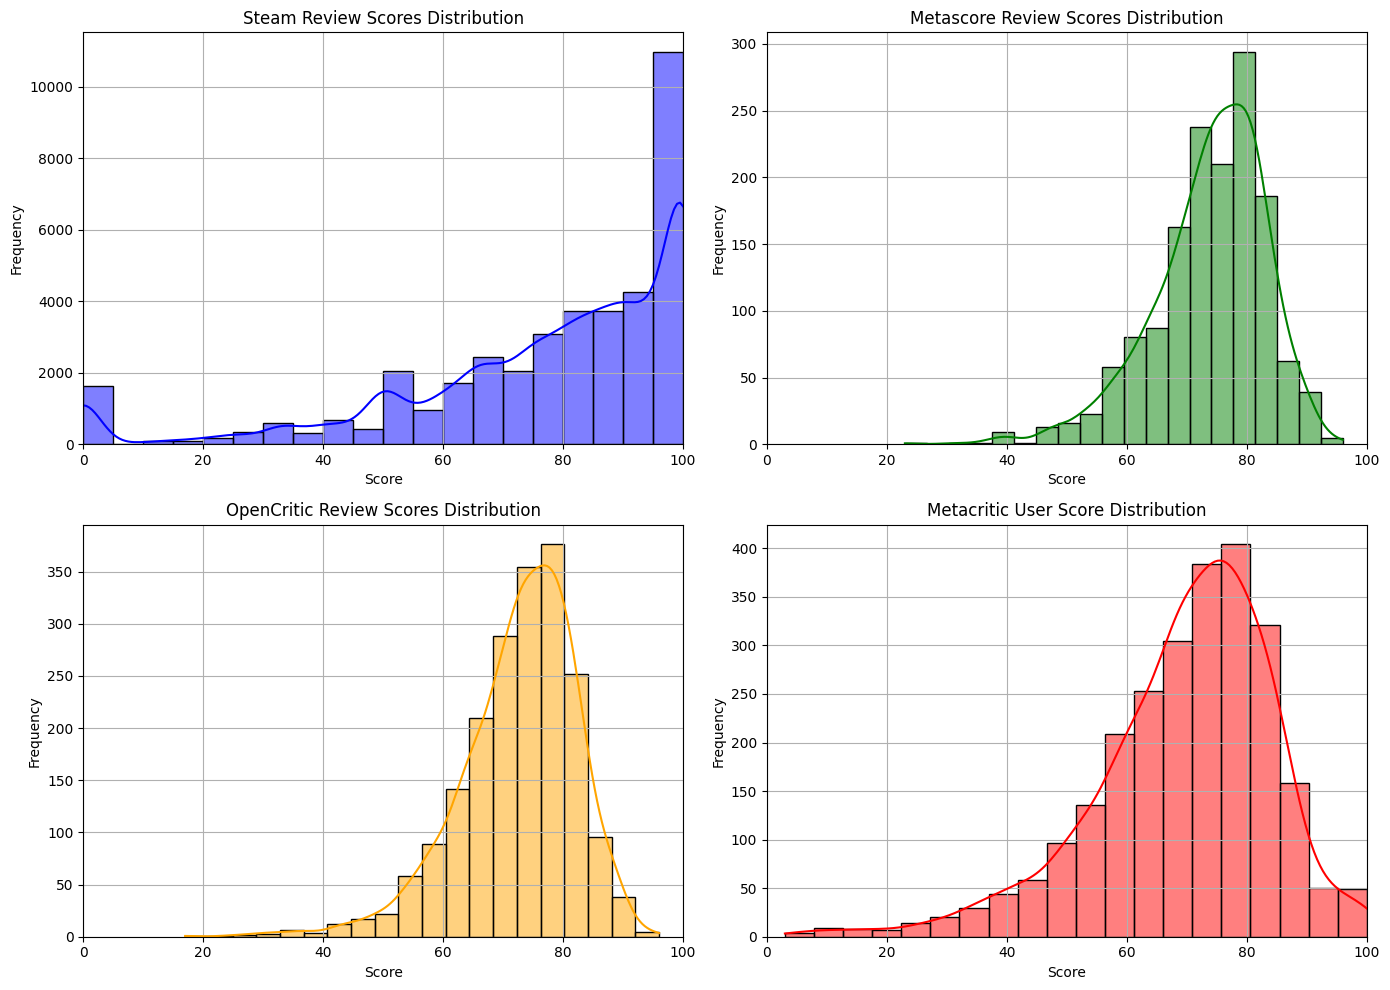

In [68]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(game_reviews_steam['score'], bins=20, kde=True, color='blue')
plt.title('Steam Review Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid()

plt.subplot(2, 2, 2)
sns.histplot(game_reviews_metascore['score'], bins=20, kde=True, color='green')
plt.title('Metascore Review Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid()

plt.subplot(2, 2, 3)
sns.histplot(game_reviews_opencritic['score'], bins=20, kde=True, color='orange')
plt.title('OpenCritic Review Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid()

plt.subplot(2, 2, 4)
sns.histplot(game_reviews_metacritic['score'], bins=20, kde=True, color='red')
plt.title('Metacritic User Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid()
plt.tight_layout()

#### All the distributions are skewed to the left suggesting that majority of the reviews are on the higher side.

#### Reviewers on Steam are extremely generous, this is expected because Steam reviews are user driven and players tend to give higher scores than critics.

#### The reviews on other platforms are normally distributed with slight left skewness. Most of the reviews lie between the range of 70-80 with very few outliers both on the high and low end. It makes sense since these are critic reviews and critics tend to be more conservative.

#### It has generally been observed that games with poor reviews tend to on sale quicker. But I will investigate that with price history data later in the analysis.

In [66]:
print(f"Number of Steam reviews: {len(game_reviews[game_reviews['source'] == 'Steam'])}")
print(f"Number of Metascore reviews: {len(game_reviews[game_reviews['source'] == 'Metascore'])}")
print(f"Number of OpenCritic reviews: {len(game_reviews[game_reviews['source'] == 'OpenCritic'])}")
print(f"Number of Metacritic User Score reviews: {len(game_reviews[game_reviews['source'] == 'Metacritic User Score'])}")

Number of Steam reviews: 39323
Number of Metascore reviews: 3342
Number of OpenCritic reviews: 4259
Number of Metacritic User Score reviews: 6832


#### We can see above that the number of reviews for other review platforms is very less compared to Steam, so for my analysis I will consider only Steam reviews.

In [61]:
game_reviews_steam = game_reviews[game_reviews['source'] == 'Steam']
game_reviews_steam

,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/
4,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/
7,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,018d937e-f55f-735f-8a36-ef267cb911fe,Steam,50.0,3725,https://store.steampowered.com/app/251950/
8,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,018d937f-1b52-72fe-8828-fc57d66141ae,Steam,89.0,4324,https://store.steampowered.com/app/252870/
12,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,018d937f-4eeb-7084-878f-15fb7e4c22e9,Steam,50.0,57,https://store.steampowered.com/app/269850/
...,...,...,...,...,...,...,...,...,...,...,...,...
53750,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,01919e99-3f84-704f-9ba7-79afd7440a36,Steam,100.0,5,https://store.steampowered.com/app/3186760/
53751,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/
53753,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/
53754,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/


### Are high scores also the ones with huge review counts, or do popular games have lower averages?

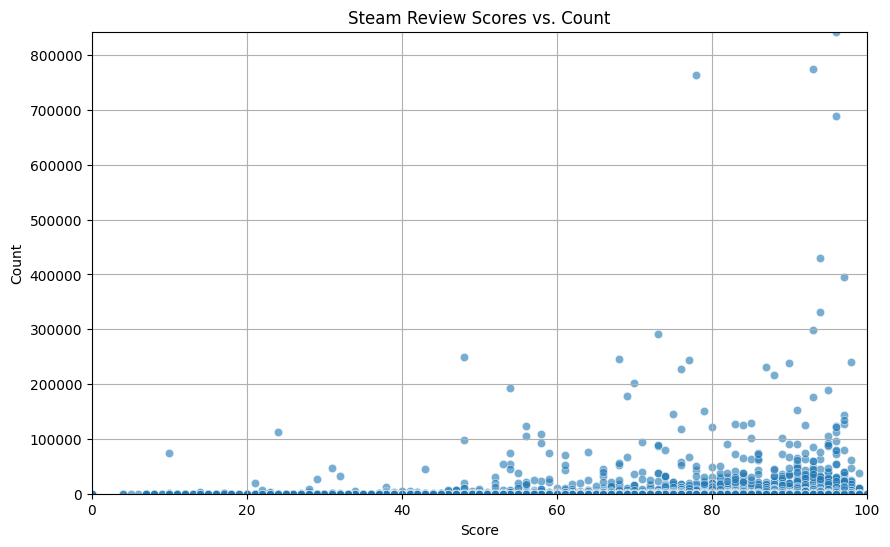

In [111]:
# scatter plot between score and count

plt.figure(figsize=(10, 6))
sns.scatterplot(data=game_reviews_steam, x='score', y='count', alpha=0.6)
plt.title('Steam Review Scores vs. Count')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.ylim(0, game_reviews_steam['count'].max() + 100)
plt.grid()
plt.show()

#### Seems like generally higher review counts leads to higher scores with some exceptions where popular(higher review count) games have lower scores.

In [77]:
# adding release year to the dataframe for analysis by year

game_reviews_steam['release_year'] = pd.to_datetime(game_reviews_steam['release_date']).dt.year
game_reviews_steam

,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url,release_year
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/,2021
4,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/,2023
7,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,018d937e-f55f-735f-8a36-ef267cb911fe,Steam,50.0,3725,https://store.steampowered.com/app/251950/,2023
8,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,018d937f-1b52-72fe-8828-fc57d66141ae,Steam,89.0,4324,https://store.steampowered.com/app/252870/,2021
12,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,018d937f-4eeb-7084-878f-15fb7e4c22e9,Steam,50.0,57,https://store.steampowered.com/app/269850/,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53750,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,01919e99-3f84-704f-9ba7-79afd7440a36,Steam,100.0,5,https://store.steampowered.com/app/3186760/,2024
53751,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/,2024
53753,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/,2024
53754,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/,2024


### To get a fair understanding of the Steam score, I will be using the Bayesian Average Rating to avoid overestimating a high score with low review count.

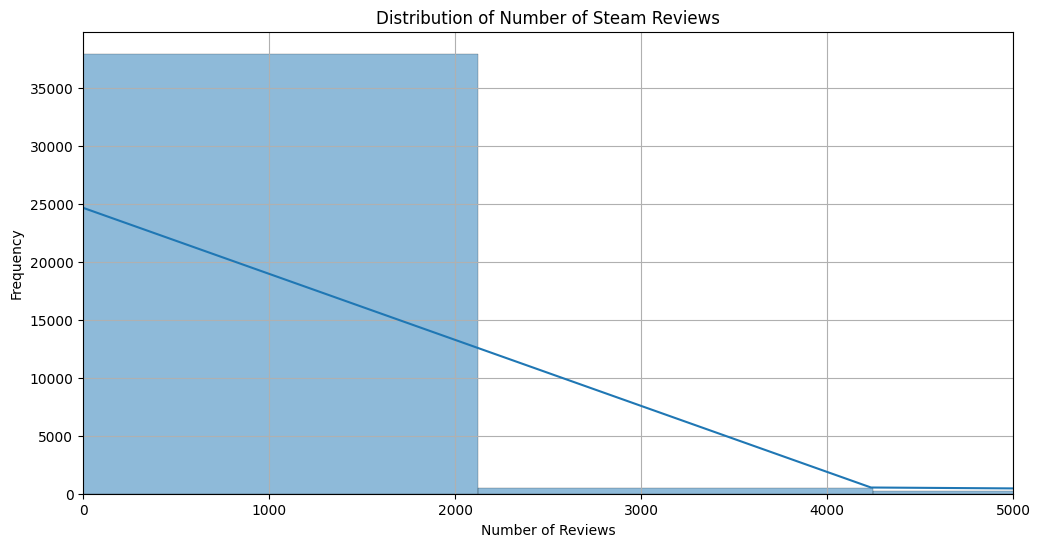

In [81]:
# Number of reviews distribution to get the value of the smoothing parameter(k) for Bayesian average

plt.figure(figsize=(12, 6))
sns.histplot(data=game_reviews_steam, x='count', kde=True, palette='viridis')
plt.title('Distribution of Number of Steam Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 5000)
plt.grid()
plt.show()

In [82]:
def bayesian_average_rating(row, global_avg, k=1000):
    """
    Computes the Bayesian average rating for a game.
        - row: A pandas Series containing 'score' and 'count' for the game.
        - global_avg: The global average score across all games.
        - k: The minimum number of reviews required to consider the score reliable (smoothing parameter).
    """
    score = row['score']
    count = row['count']
    weighted_score = (count * score + k * global_avg) / (count + k)
    return weighted_score

In [83]:
# Calculating and adding the Bayesian average rating to the DataFrame

global_avg_score = game_reviews_steam['score'].mean()
game_reviews_steam['bayesian_avg_score'] = game_reviews_steam.apply(bayesian_average_rating, axis=1, global_avg=global_avg_score)
game_reviews_steam

,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url,release_year,bayesian_avg_score
0,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/,2021,77.102404
4,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/,2023,82.641794
7,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,018d937e-f55f-735f-8a36-ef267cb911fe,Steam,50.0,3725,https://store.steampowered.com/app/251950/,2023,55.635955
8,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,018d937f-1b52-72fe-8828-fc57d66141ae,Steam,89.0,4324,https://store.steampowered.com/app/252870/,2021,86.676538
12,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,018d937f-4eeb-7084-878f-15fb7e4c22e9,Steam,50.0,57,https://store.steampowered.com/app/269850/,2021,75.193837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53750,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,01919e99-3f84-704f-9ba7-79afd7440a36,Steam,100.0,5,https://store.steampowered.com/app/3186760/,2024,76.746155
53751,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/,2024,78.049482
53753,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/,2024,76.712188
53754,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/,2024,76.576732


In [84]:
game_reviews_steam_2021 = game_reviews_steam[game_reviews_steam['release_year'] == 2021]
game_reviews_steam_2022 = game_reviews_steam[game_reviews_steam['release_year'] == 2022]
game_reviews_steam_2023 = game_reviews_steam[game_reviews_steam['release_year'] == 2023]
game_reviews_steam_2024 = game_reviews_steam[game_reviews_steam['release_year'] == 2024]

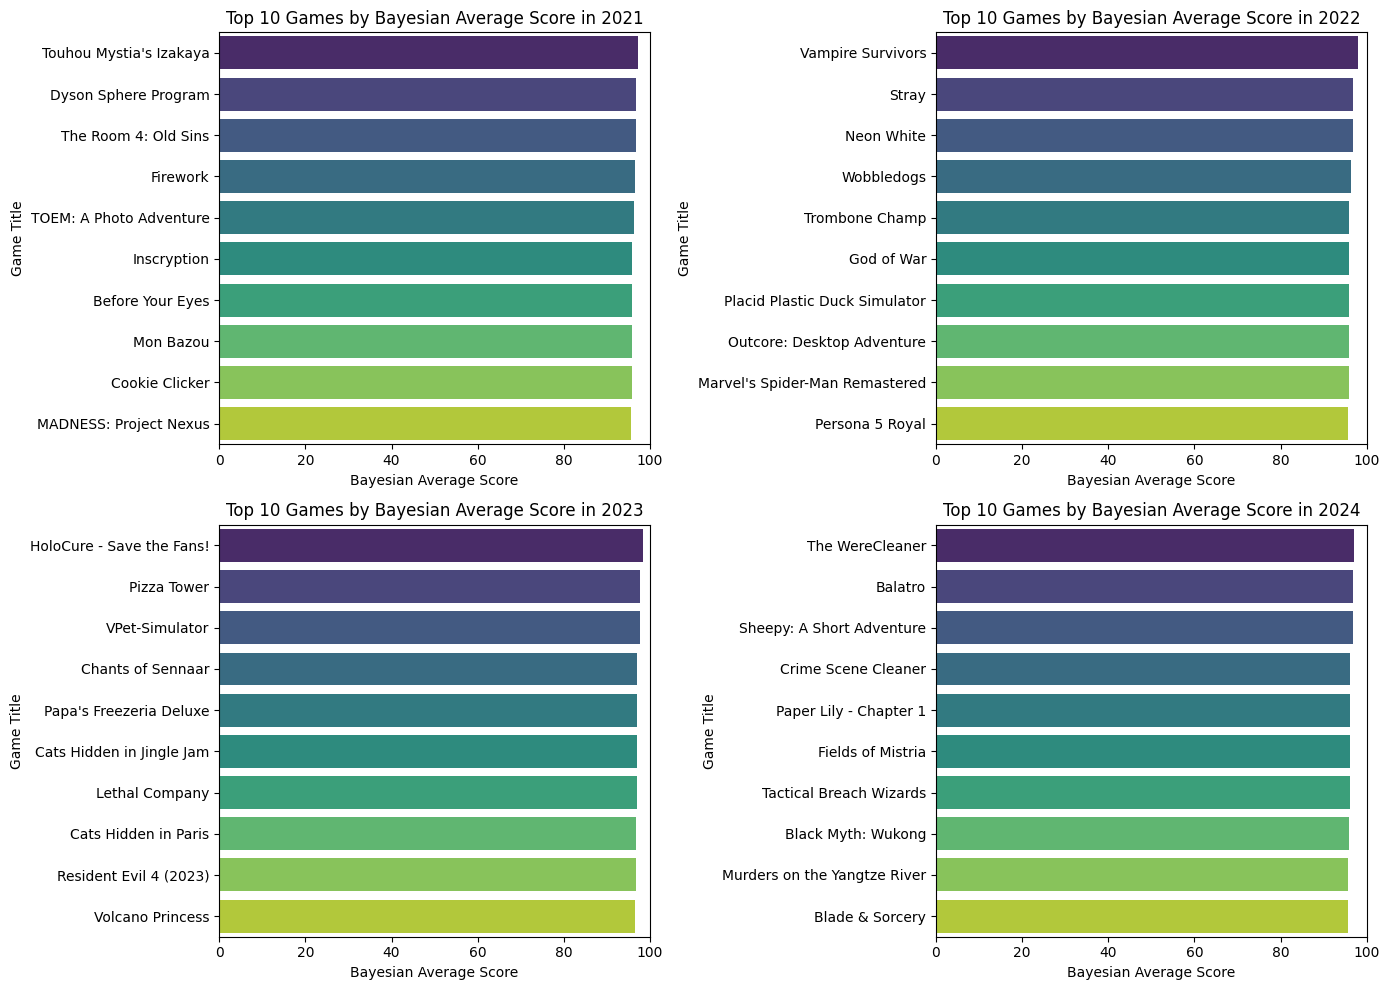

In [90]:
# horizontal bar chart of top 10 games by bayesian average score each year

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
top_10_2021 = game_reviews_steam_2021.nlargest(10, 'bayesian_avg_score')
sns.barplot(data=top_10_2021, y='title', x='bayesian_avg_score', palette='viridis')
plt.title('Top 10 Games by Bayesian Average Score in 2021')
plt.xlabel('Bayesian Average Score')
plt.ylabel('Game Title')
plt.xlim(0, 100)

plt.subplot(2, 2, 2)
top_10_2022 = game_reviews_steam_2022.nlargest(10, 'bayesian_avg_score')
sns.barplot(data=top_10_2022, y='title', x='bayesian_avg_score', palette='viridis')
plt.title('Top 10 Games by Bayesian Average Score in 2022')
plt.xlabel('Bayesian Average Score')
plt.ylabel('Game Title')
plt.xlim(0, 100)

plt.subplot(2, 2, 3)
top_10_2023 = game_reviews_steam_2023.nlargest(10, 'bayesian_avg_score')
sns.barplot(data=top_10_2023, y='title', x='bayesian_avg_score', palette='viridis')
plt.title('Top 10 Games by Bayesian Average Score in 2023')
plt.xlabel('Bayesian Average Score')
plt.ylabel('Game Title')
plt.xlim(0, 100)

plt.subplot(2, 2, 4)
top_10_2024 = game_reviews_steam_2024.nlargest(10, 'bayesian_avg_score')
sns.barplot(data=top_10_2024, y='title', x='bayesian_avg_score', palette='viridis')
plt.title('Top 10 Games by Bayesian Average Score in 2024')
plt.xlabel('Bayesian Average Score')
plt.ylabel('Game Title')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


### Lets now see who are the top developers with highest reviewed games on Steam.

In [97]:
# fetching game developers along with their games and reviews

game_developers = pd.read_sql("SELECT * " \
                            "FROM developers d " \
                            "JOIN game_developers gd ON d.developer_id = gd.developer_id " \
                            "JOIN games g ON gd.itad_id = g.itad_id " \
                            "JOIN reviews r ON g.itad_id = r.itad_id; ", con)

game_developers

,developer_id,name,itad_id,developer_id,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url
0,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Metacritic User Score,NaN,3,https://metacritic.com/game/warp-frontier/user...
1,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Metascore,66.0,5,https://metacritic.com/game/warp-frontier/crit...
2,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,OpenCritic,53.0,4,https://opencritic.com/game/12048/warp-frontier
3,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/
4,2,QCF Design,018d937f-05cc-70d8-a9fd-b60cf6f8048e,2,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Metacritic User Score,78.0,72,https://metacritic.com/game/desktop-dungeons/u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63796,22455,Lu,01919c3d-0228-71d6-9a80-b61de4a3ee1b,22455,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Metacritic User Score,75.0,4,https://metacritic.com/game/nagaisan/user-revi...
63797,22455,Lu,01919c3d-0228-71d6-9a80-b61de4a3ee1b,22455,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/
63798,33948,nongshy,01919ce4-2521-719f-9fe8-966805c6ba80,33948,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/
63799,24414,Quantum Quiver Games,01919561-88ca-73f4-8123-1b114c928691,24414,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/


In [98]:
# filtering for steam reviews only

game_developers_steam = game_developers[game_developers['source'] == 'Steam']
game_developers_steam

,developer_id,name,itad_id,developer_id,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url
3,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/
6,2,QCF Design,018d937f-05cc-70d8-a9fd-b60cf6f8048e,2,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/
7,3,Cornered Rat Software,018d937e-f55f-735f-8a36-ef267cb911fe,3,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,018d937e-f55f-735f-8a36-ef267cb911fe,Steam,50.0,3725,https://store.steampowered.com/app/251950/
11,4,Leafy Games,018d937f-1b52-72fe-8828-fc57d66141ae,4,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,018d937f-1b52-72fe-8828-fc57d66141ae,Steam,89.0,4324,https://store.steampowered.com/app/252870/
12,5,Moonshine Studios,018d937f-4eeb-7084-878f-15fb7e4c22e9,5,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,018d937f-4eeb-7084-878f-15fb7e4c22e9,Steam,50.0,57,https://store.steampowered.com/app/269850/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63795,33947,GhostVault,01919e99-3f84-704f-9ba7-79afd7440a36,33947,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,01919e99-3f84-704f-9ba7-79afd7440a36,Steam,100.0,5,https://store.steampowered.com/app/3186760/
63797,22455,Lu,01919c3d-0228-71d6-9a80-b61de4a3ee1b,22455,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/
63798,33948,nongshy,01919ce4-2521-719f-9fe8-966805c6ba80,33948,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/
63799,24414,Quantum Quiver Games,01919561-88ca-73f4-8123-1b114c928691,24414,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/


In [101]:
# getting the bayesian average score for each developer

game_developers_steam['bayesian_avg_score'] = game_developers_steam.apply(bayesian_average_rating, axis=1, global_avg=global_avg_score)
game_developers_steam

,developer_id,name,itad_id,developer_id,itad_id,appid,title,type,release_date,early_access,mature,itad_id,source,score,count,url,bayesian_avg_score
3,1,Brawsome,018d937f-4ef3-7168-994d-7968084ab1a0,1,018d937f-4ef3-7168-994d-7968084ab1a0,226280.0,Warp Frontier,game,2021-09-28,0,0,018d937f-4ef3-7168-994d-7968084ab1a0,Steam,91.0,34,https://store.steampowered.com/app/226280/,77.102404
6,2,QCF Design,018d937f-05cc-70d8-a9fd-b60cf6f8048e,2,018d937f-05cc-70d8-a9fd-b60cf6f8048e,226620.0,Desktop Dungeons,game,2023-04-18,0,0,018d937f-05cc-70d8-a9fd-b60cf6f8048e,Steam,88.0,1122,https://store.steampowered.com/app/226620/,82.641794
7,3,Cornered Rat Software,018d937e-f55f-735f-8a36-ef267cb911fe,3,018d937e-f55f-735f-8a36-ef267cb911fe,251950.0,WWII Online,game,2023-07-06,0,0,018d937e-f55f-735f-8a36-ef267cb911fe,Steam,50.0,3725,https://store.steampowered.com/app/251950/,55.635955
11,4,Leafy Games,018d937f-1b52-72fe-8828-fc57d66141ae,4,018d937f-1b52-72fe-8828-fc57d66141ae,252870.0,PULSAR: Lost Colony,game,2021-06-22,0,0,018d937f-1b52-72fe-8828-fc57d66141ae,Steam,89.0,4324,https://store.steampowered.com/app/252870/,86.676538
12,5,Moonshine Studios,018d937f-4eeb-7084-878f-15fb7e4c22e9,5,018d937f-4eeb-7084-878f-15fb7e4c22e9,269850.0,Get Packed: Fully Loaded,game,2021-07-28,0,0,018d937f-4eeb-7084-878f-15fb7e4c22e9,Steam,50.0,57,https://store.steampowered.com/app/269850/,75.193837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63795,33947,GhostVault,01919e99-3f84-704f-9ba7-79afd7440a36,33947,01919e99-3f84-704f-9ba7-79afd7440a36,3186760.0,Baker's Agony,game,2024-09-13,0,0,01919e99-3f84-704f-9ba7-79afd7440a36,Steam,100.0,5,https://store.steampowered.com/app/3186760/,76.746155
63797,22455,Lu,01919c3d-0228-71d6-9a80-b61de4a3ee1b,22455,01919c3d-0228-71d6-9a80-b61de4a3ee1b,3187770.0,NAGAISAN,game,2024-09-11,0,0,01919c3d-0228-71d6-9a80-b61de4a3ee1b,Steam,94.0,89,https://store.steampowered.com/app/3187770/,78.049482
63798,33948,nongshy,01919ce4-2521-719f-9fe8-966805c6ba80,33948,01919ce4-2521-719f-9fe8-966805c6ba80,3188750.0,Zoul Dungeon,game,2024-09-11,0,0,01919ce4-2521-719f-9fe8-966805c6ba80,Steam,87.0,8,https://store.steampowered.com/app/3188750/,76.712188
63799,24414,Quantum Quiver Games,01919561-88ca-73f4-8123-1b114c928691,24414,01919561-88ca-73f4-8123-1b114c928691,3188840.0,Space Memory: Cats,game,2024-09-10,0,0,01919561-88ca-73f4-8123-1b114c928691,Steam,50.0,2,https://store.steampowered.com/app/3188840/,76.576732


In [103]:
# adding a release year column

game_developers_steam['release_year'] = pd.to_datetime(game_developers_steam['release_date']).dt.year

In [104]:
# getting the top 10 developers overall with highest average bayesian score

top_developers = game_developers_steam.groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nlargest(10, 'avg_bayesian_score')

top_developers


,avg_bayesian_score,game_count
name,,
Poncle,97.911190,1
Tour De Pizza,97.656330,1
LB Game,97.551020,1
Rundisc,97.083182,1
Flipline Studios,97.072871,1
Howlin' Hugs,97.021394,1
BlueTwelve Studio,96.858429,1
LocalThunk,96.850169,1
MrSuicideSheep,96.848841,1


#### We can see above that all of the top developers are mostly small indie studios with no big AAA names present. Lets now break it down by each year and see if there is any difference.

In [114]:
bottom_developers = game_developers_steam.groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nsmallest(10, 'avg_bayesian_score')

bottom_developers

,avg_bayesian_score,game_count
name,,
杭州游卡网络技术有限公司,10.890345,1
KAGAMI Ⅱ WORKs,24.465171,1
Intercept Games,30.750327,1
Toys for Bob,32.447670,2
Flaring Cloister,33.024874,1
奇门互娱,35.405710,1
Ubisoft Bucharest,40.320253,1
Ubisoft Osaka,40.320253,1
Ubisoft San Francisco,40.320253,1


#### Top 2021

In [105]:
# getting top 10 developers each year with highest average bayesian score

top_developers_2021 = game_developers_steam[game_developers_steam['release_year'] == 2021].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nlargest(10, 'avg_bayesian_score')

top_developers_2021

,avg_bayesian_score,game_count
name,,
Youthcat Studio,96.744962,1
Fireproof Games,96.739598,1
Shiying Studio,96.492042,1
Something We Made,96.192506,1
Daniel Mullins Games,95.844173,1
GoodbyeWorld Games,95.841554,1
Santa Goat,95.817204,1
DashNet,95.752364,1
Orteil,95.752364,1


#### Bottom 2021

In [115]:
bottom_developers_2021 = game_developers_steam[game_developers_steam['release_year'] == 2021].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nsmallest(10, 'avg_bayesian_score')

bottom_developers_2021

,avg_bayesian_score,game_count
name,,
杭州游卡网络技术有限公司,10.890345,1
Proximity Games,47.965765,1
DICE,48.113989,1
Sumo Digital,50.415943,1
Motorsport Games,50.961359,1
Tuque Games,53.841403,1
FishSoft LLC,54.298201,1
Unicube,55.847012,1
Tiburon,55.865966,1


#### Top 2022

In [106]:
top_developers_2022 = game_developers_steam[game_developers_steam['release_year'] == 2022].groupby('name').agg({'bayesian_avg_score': 'mean', 
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nlargest(10, 'avg_bayesian_score')

top_developers_2022

,avg_bayesian_score,game_count
name,,
Poncle,97.911190,1
BlueTwelve Studio,96.858429,1
Angel Matrix,96.697897,1
Animal Uprising,96.283663,1
Holy Wow Studios LLC,95.914093,1
Jetpack Interactive,95.828898,1
SCE Santa Monica Studio,95.828898,1
Santa Monica Studio,95.828898,1
turbolento games,95.813069,1


#### Bottom 2022

In [117]:
bottom_developers_2022 = game_developers_steam[game_developers_steam['release_year'] == 2022].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nsmallest(10, 'avg_bayesian_score')

bottom_developers_2022

,avg_bayesian_score,game_count
name,,
KAGAMI Ⅱ WORKs,24.465171,1
Activision Shanghai,32.447670,2
Beenox,32.447670,2
Demonware,32.447670,2
High Moon Studios,32.447670,2
Infinity Ward,32.447670,2
Raven Software,32.447670,2
Sledgehammer Games,32.447670,2
Toys for Bob,32.447670,2


#### Top 2023

In [107]:
top_developers_2023 = game_developers_steam[game_developers_steam['release_year'] == 2023].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nlargest(10, 'avg_bayesian_score')
top_developers_2023

,avg_bayesian_score,game_count
name,,
KayAnimate,98.428722,1
Tour De Pizza,97.656330,1
LB Game,97.551020,1
Rundisc,97.083182,1
Flipline Studios,97.072871,1
Zeekerss,96.948613,1
养蛋人 Egg Hatcher,96.509308,1
养蛋人工作室 Egg Hatcher,96.509308,1
WONDER POTION,96.429137,1


#### Bottom 2023

In [118]:
bottom_developers_2023 = game_developers_steam[game_developers_steam['release_year'] == 2023].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nsmallest(10, 'avg_bayesian_score')
bottom_developers_2023

,avg_bayesian_score,game_count
name,,
Bandai Namco Forge Digitals Inc.,23.625413,1
Intercept Games,30.750327,1
505 Games,42.468874,1
Starbreeze,43.721888,1
Starbreeze Studios,43.721888,1
Lost Frame Development,44.588758,1
万象皆春,45.812422,1
Nik,46.862098,1
Fractal Games,49.178555,1


#### Top 2024

In [108]:
top_developers_2024 = game_developers_steam[game_developers_steam['release_year'] == 2024].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nlargest(10, 'avg_bayesian_score')
top_developers_2024

,avg_bayesian_score,game_count
name,,
Howlin' Hugs,97.021394,1
LocalThunk,96.850169,1
MrSuicideSheep,96.848841,1
Leef 6010,96.092525,1
NPC Studio,96.003663,1
Suspicious Developments,95.994170,1
Suspicious Developments Inc,95.994170,1
Game Science,95.977042,1
OMEGAMES STUDIO,95.674166,1


#### Bottom 2024

In [128]:
bottom_developers_2024 = game_developers_steam[game_developers_steam['release_year'] == 2024].groupby('name').agg({'bayesian_avg_score': 'mean',
    'title': 'count'
}).rename(columns={'bayesian_avg_score': 'avg_bayesian_score', 'title': 'game_count'}).nsmallest(10, 'avg_bayesian_score')
bottom_developers_2024

,avg_bayesian_score,game_count
name,,
Flaring Cloister,33.024874,1
奇门互娱,35.405710,1
Ubisoft Bucharest,40.320253,1
Ubisoft Osaka,40.320253,1
Ubisoft Pune,40.320253,1
Ubisoft San Francisco,40.320253,1
Ac Games,40.845245,1
Bohemia Interactive,49.865458,1
FLINT,51.249338,1


#### The trend seems to be the same each year with small to mid size studios topping the charts with some exceptions like "Santa Monica studios" and "Game Science" with their big titles like God of War - Ragnarok and Black Myth Wukong. God of War was ofcourse a re-release on PC and not a new title.

#### On the contrary we can see some of the big names like Ubisoft, Treyarch, Activision, and Sledgehammer.  

In [138]:
DB_PATH = "/Users/farazahmed/Documents/GitHub/steam-discount-forecast/data/steam_sales.db"
MIN_REVIEWS = 100  # adjust if you like

con = sqlite3.connect(DB_PATH)

# --- 1) Base table: one row per game with Steam score & count ---
q_base = """
SELECT
  g.itad_id, g.title, g.release_date,
  r.score AS steam_score, r.count AS steam_count
FROM games g
JOIN reviews r
  ON r.itad_id = g.itad_id AND r.source = 'Steam'
WHERE g.release_date BETWEEN '2021-01-01' AND '2024-12-31'
"""
base = pd.read_sql(q_base, con)

# Keep only games with enough reviews
base = base[base["steam_count"].fillna(0) >= MIN_REVIEWS].copy()

# If nothing left, stop here
assert len(base), "No rows after MIN_REVIEWS filter. Lower MIN_REVIEWS or check data."

# --- 2) Compute deciles on Steam score (1 = lowest … 10 = highest) ---
base["decile"] = pd.qcut(base["steam_score"], 10, labels=range(1,11))

# --- 3) Bring tags (many-to-many) ---
q_tags = """
SELECT gt.itad_id, t.name AS tag
FROM game_tags gt
JOIN tags t ON t.tag_id = gt.tag_id
"""
tags = pd.read_sql(q_tags, con)

# --- 4) Bring publishers (many-to-many) ---
q_pub = """
SELECT gp.itad_id, p.name AS publisher
FROM game_publishers gp
JOIN publishers p ON p.publisher_id = gp.publisher_id
"""
pubs = pd.read_sql(q_pub, con)

con.close()

# --- 5) Join base with tags/publishers and analyze top vs bottom decile ---

# Tags
df_tags = base.merge(tags, on="itad_id", how="left").dropna(subset=["tag"])
top_dec = df_tags[df_tags["decile"] == 10]
bot_dec = df_tags[df_tags["decile"] == 1]

top_tags = (top_dec.groupby("tag")["itad_id"]
            .nunique().sort_values(ascending=False)
            .rename("games").to_frame())
bot_tags = (bot_dec.groupby("tag")["itad_id"]
            .nunique().sort_values(ascending=False)
            .rename("games").to_frame())

# Also compute share within each decile (percentage of games in that decile that have the tag)
top_total = top_dec["itad_id"].nunique()
bot_total = bot_dec["itad_id"].nunique()
top_tags["share_%"] = (100 * top_tags["games"] / top_total).round(2)
bot_tags["share_%"] = (100 * bot_tags["games"] / bot_total).round(2)

print("Top decile – tags (by # games, then share%):")
display(top_tags.head(20))
print("Bottom decile – tags (by # games, then share%):")
display(bot_tags.head(20))

# Publishers
df_pubs = base.merge(pubs, on="itad_id", how="left").dropna(subset=["publisher"])
top_dec_p = df_pubs[df_pubs["decile"] == 10]
bot_dec_p = df_pubs[df_pubs["decile"] == 1]

top_pubs = (top_dec_p.groupby("publisher")["itad_id"]
            .nunique().sort_values(ascending=False)
            .rename("games").to_frame())
bot_pubs = (bot_dec_p.groupby("publisher")["itad_id"]
            .nunique().sort_values(ascending=False)
            .rename("games").to_frame())

top_pubs["share_%"] = (100 * top_pubs["games"] / top_total).round(2)
bot_pubs["share_%"] = (100 * bot_pubs["games"] / bot_total).round(2)

print("Top decile – publishers:")
display(top_pubs.head(20))
print("Bottom decile – publishers:")
display(bot_pubs.head(20))

Top decile – tags (by # games, then share%):


,games,share_%
tag,,
Adventure,129,22.28
Casual,120,20.73
Puzzle,120,20.73
Visual Novel,98,16.93
Cute,85,14.68
Action,83,14.34
RPG,60,10.36
Exploration,58,10.02
Indie,56,9.67


Bottom decile – tags (by # games, then share%):


,games,share_%
tag,,
Simulation,191,21.75
Action,178,20.27
RPG,146,16.63
Strategy,131,14.92
Sexual Content,130,14.81
Adventure,128,14.58
Casual,115,13.10
Nudity,105,11.96
Multiplayer,101,11.50


Top decile – publishers:


,games,share_%
publisher,,
Devcats,9,1.55
Plug In Digital,8,1.38
Travellin Cats,8,1.38
Nukearts Studio,7,1.21
Eternal Dream,6,1.04
Randumb Studios,6,1.04
Teamey,6,1.04
Plug-in Digital,5,0.86
Gamirror Games,5,0.86


Bottom decile – publishers:


,games,share_%
publisher,,
Plug In Digital,24,2.73
Octo Games,21,2.39
PlayWay S.A.,18,2.05
Plug-in Digital,13,1.48
BANDAI NAMCO Entertainment,11,1.25
Bandai Namco Entertainment Inc.,11,1.25
Electronic Arts,11,1.25
Pirates Of The Digital Sea,10,1.14
Bandai Namco US,10,1.14


### The above tables give us a good understanding of the top and bottom tags(genres) and publishers, calculated on the basis of review scores.

#### Both the top and bottom 10% have all kinds of game genres(tags), with some like NSFW exclusively in the bottom 10.
#### Some popular publishers are present in the bootom 10% like BANDAI, Microsoft, and THQ. Top 10% is mostly occupied by small publishers

### Lets now see which are the most popular game genres

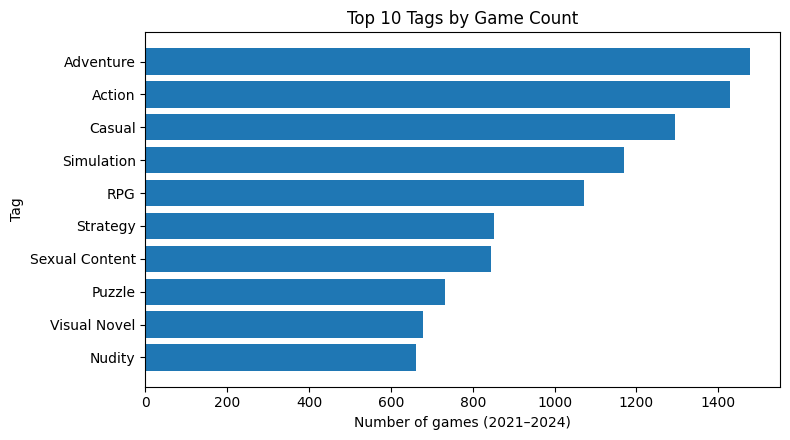

In [148]:
MIN_REVIEWS = 100

with sqlite3.connect(DB_PATH) as con:
    q_top = f"""
    WITH scoped AS (
      SELECT DISTINCT g.itad_id
      FROM games g
      JOIN reviews r ON r.itad_id = g.itad_id AND r.source='Steam'
      WHERE g.release_date BETWEEN '2021-01-01' AND '2024-12-31'
        AND IFNULL(r.count,0) >= {MIN_REVIEWS}
    )
    SELECT t.name AS tag, COUNT(DISTINCT gt.itad_id) AS n_games
    FROM game_tags gt
    JOIN scoped s ON s.itad_id = gt.itad_id
    JOIN tags t   ON t.tag_id  = gt.tag_id
    GROUP BY t.name
    ORDER BY n_games DESC
    LIMIT 10;
    """
    top_tags_df = pd.read_sql(q_top, con)

top_tags = top_tags_df['tag'].tolist()

plt.figure(figsize=(8,4.5))
plt.barh(top_tags_df['tag'][::-1], top_tags_df['n_games'][::-1])
plt.xlabel("Number of games (2021–2024)")
plt.ylabel("Tag")
plt.title("Top 10 Tags by Game Count")
plt.tight_layout()
plt.show()

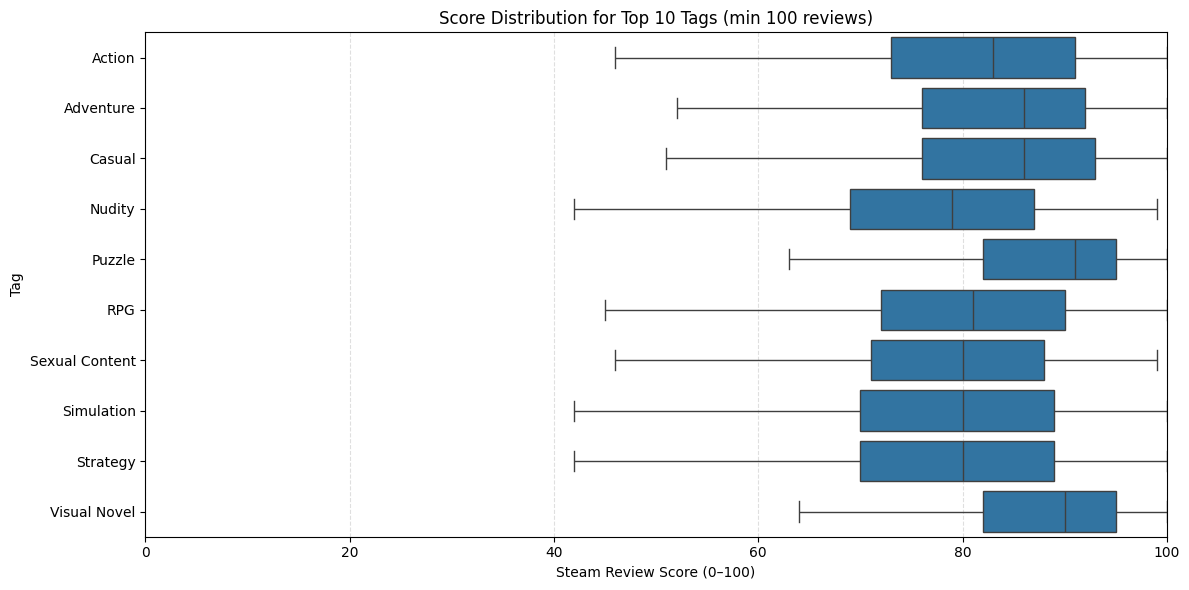

In [150]:
with sqlite3.connect(DB_PATH) as con:
    q_scores = f"""
    WITH scoped AS (
      SELECT DISTINCT g.itad_id
      FROM games g
      JOIN reviews r ON r.itad_id = g.itad_id AND r.source='Steam'
      WHERE g.release_date BETWEEN '2021-01-01' AND '2024-12-31'
        AND IFNULL(r.count,0) >= {MIN_REVIEWS}
    )
    SELECT g.itad_id, g.title, t.name AS tag, r.score AS steam_score, r.count AS steam_count
    FROM scoped s
    JOIN games g ON g.itad_id = s.itad_id
    JOIN reviews r ON r.itad_id = s.itad_id AND r.source='Steam'
    JOIN game_tags gt  ON gt.itad_id = s.itad_id
    JOIN tags t ON t.tag_id = gt.tag_id
    WHERE t.name IN ({",".join(["?"]*len(top_tags))});
    """
    df = pd.read_sql(q_scores, con, params=top_tags)

# 3) Plot distributions (boxplot or violin)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y="tag", x="steam_score", order=sorted(top_tags), showfliers=False)
plt.xlabel("Steam Review Score (0–100)")
plt.ylabel("Tag")
plt.title(f"Score Distribution for Top 10 Tags (min {MIN_REVIEWS} reviews)")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### We can observe from the above distribution that "Simulation" has the maximum range of scores suggesting that there are varying quality of simulation games some very good and some very bad but the average rating falls on the lower end compared to others. Same can be said about "Strategy".

#### "Puzzle" has the highest average rating and a tight range of scores suggesting that puzzle games are usually liked by gamers.